In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["ID", "TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [5]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
train_data.shape

(14390, 4)

In [7]:
test_path = "test_data_solution.txt"
test_data = pd.read_csv(test_path, sep=":::", names=["ID", "TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [8]:
test_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [9]:
test_data.shape

(14515, 4)

# **3. Data Cleaning**

For train dataset

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14390 entries, 0 to 14389
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           14390 non-null  int64 
 1   TITLE        14390 non-null  object
 2   GENRE        14390 non-null  object
 3   DESCRIPTION  14390 non-null  object
dtypes: int64(1), object(3)
memory usage: 449.8+ KB


In [11]:
train_data.describe()

,ID
count,14390.000000
mean,7195.500000
std,4154.179522
min,1.000000
25%,3598.250000
50%,7195.500000
75%,10792.750000
max,14390.000000


In [12]:
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [13]:
train_data.duplicated().sum()

0

For test dataset

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14515 entries, 0 to 14514
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           14515 non-null  int64 
 1   TITLE        14515 non-null  object
 2   GENRE        14515 non-null  object
 3   DESCRIPTION  14515 non-null  object
dtypes: int64(1), object(3)
memory usage: 453.7+ KB


In [15]:
test_data.describe()

,ID
count,14515.000000
mean,7258.000000
std,4190.263914
min,1.000000
25%,3629.500000
50%,7258.000000
75%,10886.500000
max,14515.000000


In [16]:
test_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [17]:
test_data.duplicated().sum()

0

# **4. EDA**

Searching for anomalies in description

i) @ in the Description

In [18]:
train_data.loc[train_data['DESCRIPTION'].str.contains(r'@\S+')].head()

,ID,TITLE,GENRE,DESCRIPTION
242,243,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,1881,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,1987,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,6580,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,8297,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


Remove "Mail svaradi@sprynet.com for translation"

Also from title we discovered that it contains title and description in different languages

ii) HTTP links in the Description





In [19]:
train_data.loc[train_data['DESCRIPTION'].str.contains(r'http\S+')].head()

,ID,TITLE,GENRE,DESCRIPTION


In [20]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=39e8d94997a3113c1e5f0110e12a9c40d35aa458f450351c6b676178fa65c5a8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [21]:
from langdetect import detect
lang_count=0
def detect_language(text):

    #for tracking the progress
    global lang_count
    lang_count=lang_count+1
    print(lang_count)

    #returning the code of language if found else unknown
    try:
        return detect(text)
    except:
        return 'Unknown'

In [22]:
train_data['Language'] = train_data['DESCRIPTION'].apply(detect_language)
test_data['Language'] = test_data['DESCRIPTION'].apply(detect_language)

Streaming output truncated to the last 5000 lines.
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
2

In [23]:
train_data

,ID,TITLE,GENRE,DESCRIPTION,Language
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,en
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,en
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,en
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,en
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,en
...,...,...,...,...,...
14385,14386,Double Crossed (1917),drama,"Young Frank Stratton, the scion of a wealthy ...",en
14386,14387,The Stolen Christmas (2015),short,The Stolen Christmas - Don't Miss The End Car...,en
14387,14388,Only Men Go to the Grave (2016),drama,"After the Iraq-Iran war ended in 1988, a blin...",en
14388,14389,Budz House (2011),comedy,"Meet Bud Howard, an endearing yet unemployed ...",en


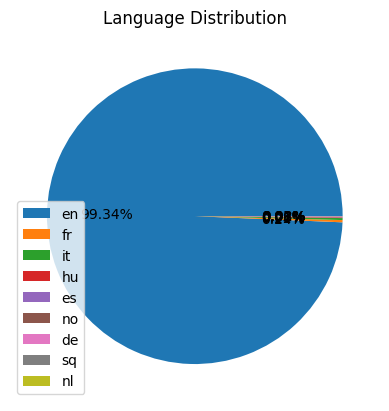

In [24]:
plt.pie(train_data.Language.value_counts().values.tolist(),autopct='%.2f%%')
plt.legend(labels=train_data.Language.value_counts().index.tolist(),loc='lower left')
plt.title('Language Distribution')
plt.show()

In [25]:
train_data["Language"].value_counts()

Language
en    14295
fr       35
it       31
hu       11
es        8
no        5
de        3
sq        1
nl        1
Name: count, dtype: int64

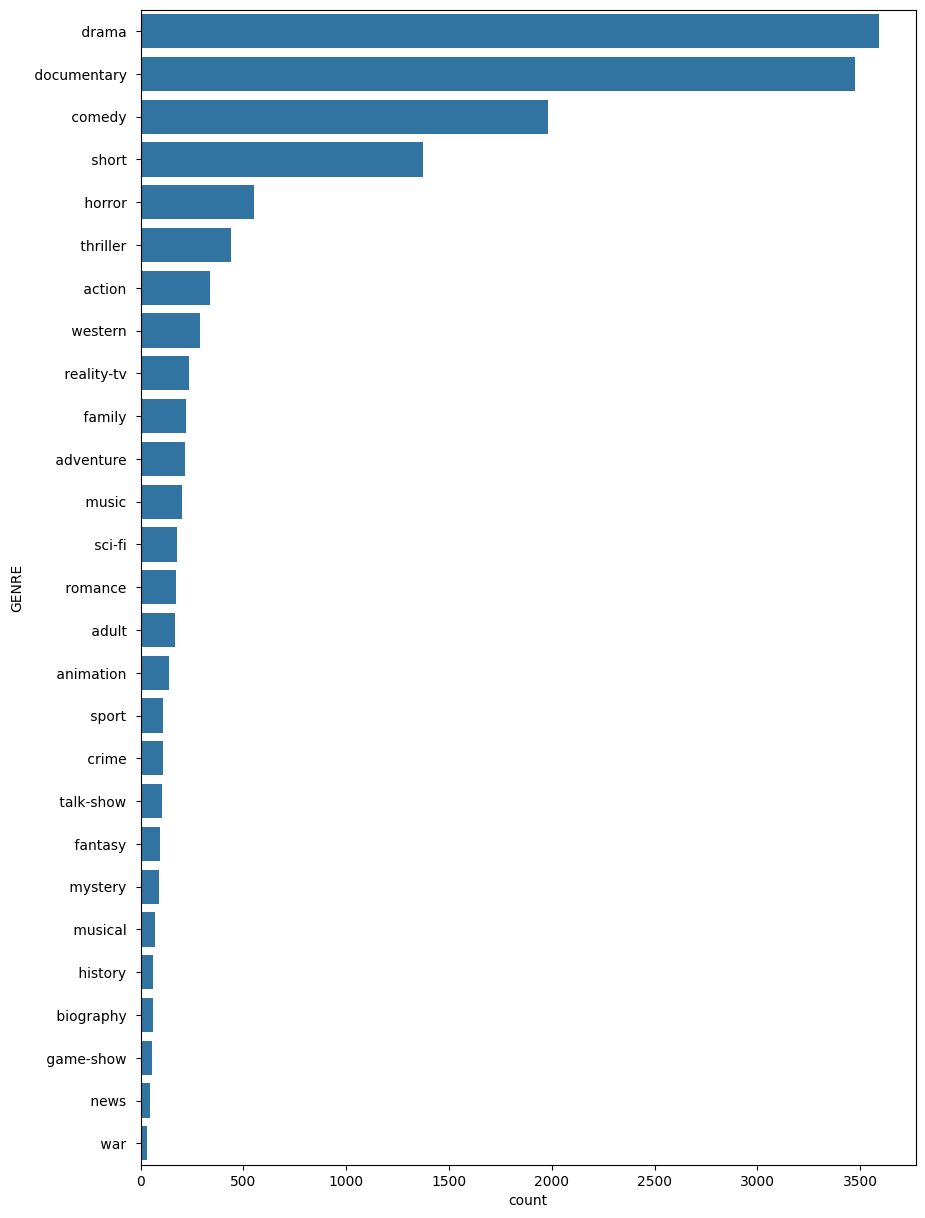

In [26]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

#**5. Data Preprocessing**

Text contains:

* Mentions

* Links

* punctuations

* unnecessary spaces

* single characters which has no meaning and it increases the dimentionality

* one unknown email address



Hence we are removing these things from the text.

In [27]:
import re
import string
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' corpus
nltk.download('stopwords')

stopwd = stopwords.words('english')

def clean_text(text):

    text= text.lower()                                                      # Lowercasing the text
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ', '', text) # Removing unknown mail
    text = re.sub('-',' ',text.lower())                                     # Replacing `x-x` as `x x`
    text = re.sub(r'@\S+', '', text)                                        # Removing mentions
    text = re.sub(r'http\S+', '', text)                                     # Removing Links
    text = re.sub(f'[{string.punctuation}]', '', text)                      # Remove punctuations
    text = re.sub(f'[{string.digits}]', '', text)                           # Remove numbers
    text = re.sub(r'\s+', ' ', text)                                        # Removing unnecessary spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)                             # Removing single characters

    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i)>2])     # Removing the stop words

    return text.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
clean_text(train_data["DESCRIPTION"][0])

'listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

In [29]:
train_data["clean_description"]=train_data["DESCRIPTION"].apply(clean_text)
test_data["clean_description"]=test_data["DESCRIPTION"].apply(clean_text)

In [30]:
train_data.head(5)["clean_description"]

0    listening conversation doctor parents year old...
1    brother sister past incestuous relationship cu...
2    bus empties students field trip museum natural...
3    help unemployed father make ends meet edith tw...
4    films title refers recovered bodies ground zer...
Name: clean_description, dtype: object

In [31]:
train_data["len_desc"] = train_data["DESCRIPTION"].apply(len)
train_data["len_clean_desc"] = train_data["clean_description"].apply(len)

In [32]:
train_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION,Language,clean_description,len_desc,len_clean_desc
6330,6331,Logging Out (2012),short,Plot is based on a gay guy who is finding a l...,en,plot based gay guy finding love someone specia...,396,226
7321,7322,A Catch of Consequence (????),drama,Makepeace Burke runs her late father's tavern...,en,makepeace burke runs late fathers tavern bosto...,448,312
8346,8347,Een huis in een schoen (1971),family,When Sint Nicholaas' steam boat gets stuck on...,en,sint nicholaas steam boat gets stuck ijsselmee...,285,202
6985,6986,No Sex Please: We're British (1973),comedy,Porn store owner Pete orders some new stuff f...,en,porn store owner pete orders new stuff supplie...,2012,1348
9347,9348,Freedom of the Pack (2017),documentary,"In Native cultures, the wolf is seen as ""The ...",en,native cultures wolf seen teacher showing one ...,1871,1336


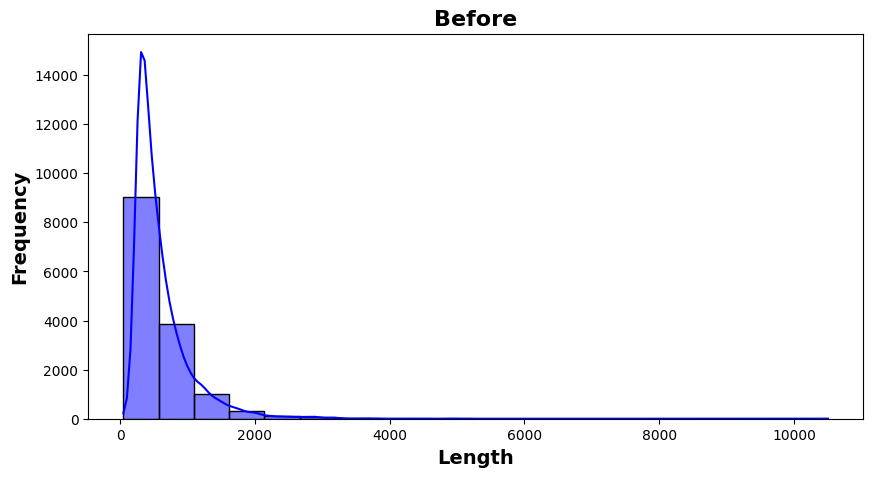

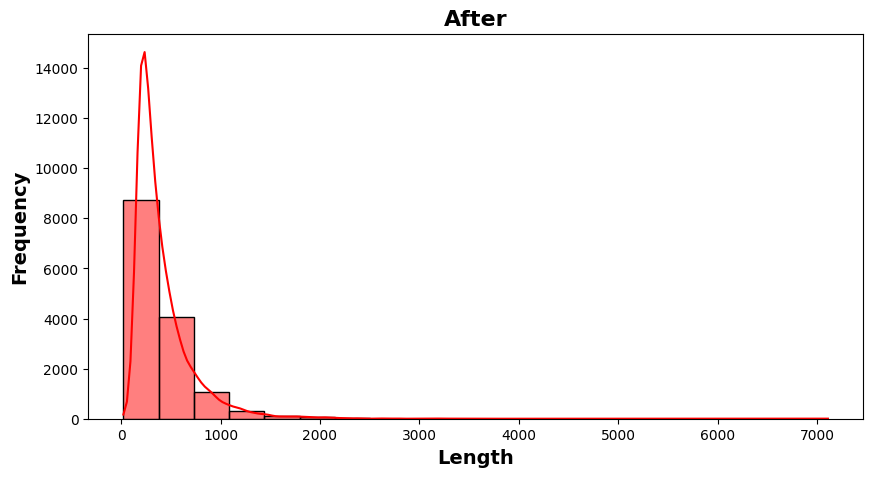

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x='len_desc', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Before', fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x='len_clean_desc', bins=20, kde=True, color='red')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('After', fontsize=16, fontweight='bold')

plt.show()

In [34]:
#finding the number of descriptions with length greater than 2000
(train_data["len_clean_desc"]>2000).value_counts()

len_clean_desc
False    14336
True        54
Name: count, dtype: int64

In [35]:
# if length of description is greater 2000, we will truncate it randomly from 250 to 2000 because most of the description is less than 1500
train_data["clean_description"] = train_data["clean_description"].apply(lambda x: x[:np.random.randint(250,2000)] if len(x)>2000 else x)

In [36]:
#finding the number of descriptions with length greater than 2000
train_data["len_clean_desc"] = train_data["clean_description"].apply(len)
(train_data["len_clean_desc"]>2000).value_counts()

len_clean_desc
False    14390
Name: count, dtype: int64

In [37]:
pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 664.2 kB/s eta 0:00:00


In [38]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator()
# translating the description to english if language is not english
def trans(text):
    try:
        return translator.translate(text)
    except Exception as e:
        return text

train_data["clean_description"] = train_data.apply(lambda x: trans(x["clean_description"]) if x['Language']!='en' else x['clean_description'],axis=1)

In [39]:
train_data[train_data["Language"]!="en"].iloc[0]

ID                                                                 211
TITLE                                  Divorzio alla siciliana (1963) 
GENRE                                                          comedy 
DESCRIPTION           Il barone Fifě ha bisogno di un erede per ave...
Language                                                            it
clean_description    Baron Fifě needs an heir to have his father's ...
len_desc                                                           644
len_clean_desc                                                     518
Name: 210, dtype: object

In [40]:
detect_language(train_data[train_data["Language"]!="en"].iloc[0]["clean_description"])

28906


'en'

In [41]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lametize(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [42]:
lametize("I am going to the store")

'I be go to the store'

In [43]:
train_data["clean_description"] = train_data["clean_description"].apply(lambda x: lametize(x))

In [44]:
train_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION,Language,clean_description,len_desc,len_clean_desc
10113,10114,The Birth of Freedom (2008),documentary,How the West was the first major civilization...,en,west first major civilization achieve widespre...,356,258
1036,1037,Jordan Clark: Machine in Girls Jeans (2017),documentary,In 2015 Jordan Clark announced himself on the...,en,jordan clark announce world stage scootering s...,489,299
4408,4409,Par le sang des autres (1974),drama,In a little French town everything goes on as...,en,little french town everything go usual people ...,616,389
12180,12181,Toms Welt (1999),short,"Tom views movies not with normal eays, but wi...",en,tom view movie normal eay heart feeling,75,43
9546,9547,"""Taxi girl"" (2006)",game-show,"Vicky Stavropoulou, a well-known Greek actres...",en,vicky stavropoulou well know greek actress dri...,321,233


In [45]:
train_data.drop(columns=["len_desc","len_clean_desc","Language","DESCRIPTION"],inplace=True)

In [46]:
train_data

,ID,TITLE,GENRE,clean_description
0,1,Oscar et la dame rose (2009),drama,listen conversation doctor parent year old osc...
1,2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,film title refer recover body grind zero also ...
...,...,...,...,...
14385,14386,Double Crossed (1917),drama,young frank stratton scion wealthy family temp...
14386,14387,The Stolen Christmas (2015),short,steal christmas do not miss end carol beautifu...
14387,14388,Only Men Go to the Grave (2016),drama,iraq iran war end blind mother welcome estrang...
14388,14389,Budz House (2011),comedy,meet bud howard endear yet unemployed lazy sla...


In [47]:
train_data["input"] = train_data["TITLE"]+" "+train_data["clean_description"]
test_data["input"] = test_data["TITLE"]+" "+test_data["clean_description"]

In [48]:
train_data.head()

,ID,TITLE,GENRE,clean_description,input
0,1,Oscar et la dame rose (2009),drama,listen conversation doctor parent year old osc...,Oscar et la dame rose (2009) listen conversa...
1,2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,Cupid (1997) brother sister past incestuous ...
2,3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,"Young, Wild and Wonderful (1980) bus empty s..."
3,4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,The Secret Sin (1915) help unemployed father...
4,5,The Unrecovered (2007),drama,film title refer recover body grind zero also ...,The Unrecovered (2007) film title refer reco...


In [49]:
test_data.head()

,ID,TITLE,GENRE,DESCRIPTION,Language,clean_description,input
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",en,brane loves life car apartment job especially ...,Edgar's Lunch (1998) brane loves life car ap...
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",en,spain march quico naughty child three belongin...,La guerra de papá (1977) spain march quico n...
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,en,one year life albin family shepherds north tra...,Off the Beaten Track (2010) one year life al...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",en,father died hasnt spoken brother years serious...,Meu Amigo Hindu (2015) father died hasnt spo...
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,en,known internationally martial arts superstar b...,Er nu zhai (1955) known internationally mart...


In [50]:
# Analysis of the GENRE of movies
train_data["GENRE"].unique(),train_data["GENRE"].unique().shape

(array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
        ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
        ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
        ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
        ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
        ' musical ', ' war '], dtype=object),
 (27,))

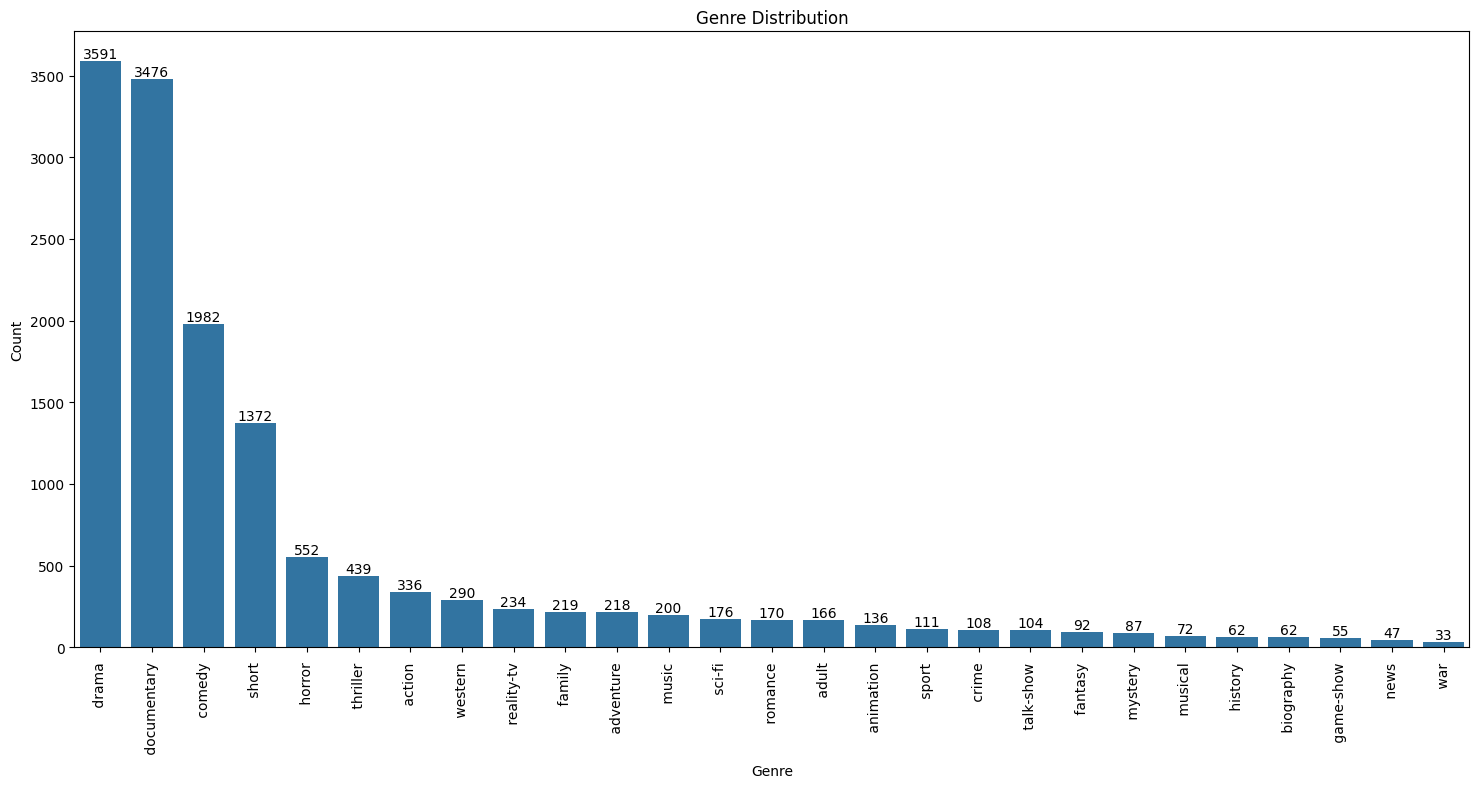

In [51]:
# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(18,8))
ax=sns.countplot(x='GENRE' , data=train_data , order=train_data['GENRE'].value_counts().index )
ax.bar_label(ax.containers[0])
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#**5. Model Building**

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',max_features=35000)

In [53]:
X_train_data_transformed = tfidf.fit_transform(train_data["input"])
X_test_data_transformed = tfidf.transform(test_data["input"])

In [54]:
pip install imblearn

In [55]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)
# We will pass to it the output of TfidfVectorizer from train data
x_train_data_resampled, y_train_data_resampled = sampler.fit_resample(
    X_train_data_transformed, train_data['GENRE'])

In [56]:
!pip install seaborn

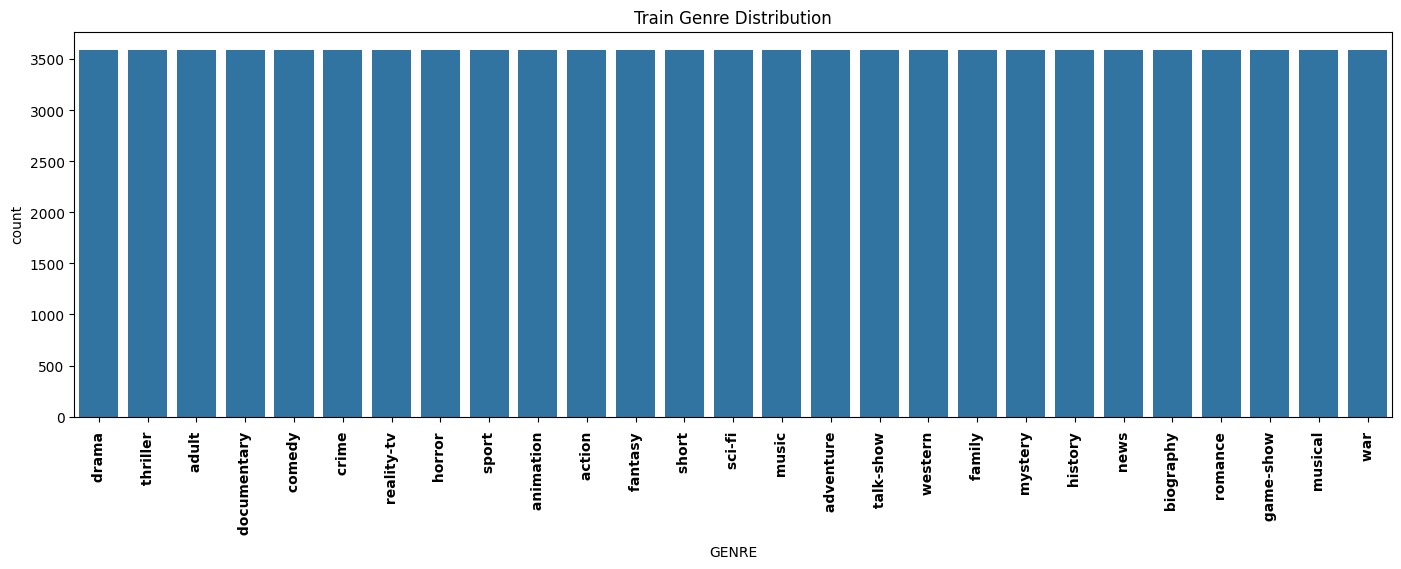

In [57]:
plt.subplots(figsize=(17, 5))
sns.countplot(x='GENRE', data=y_train_data_resampled.to_frame())
plt.title("Train Genre Distribution")
plt.xticks(rotation=90,fontweight="bold")
plt.show()

In [58]:
x_train_data_resampled.shape, y_train_data_resampled.shape

((96957, 35000), (96957,))

In [59]:
# Encoding the Genres using the label encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train_data = encoder.fit_transform(y_train_data_resampled)
y_test_data = encoder.transform(test_data["GENRE"])

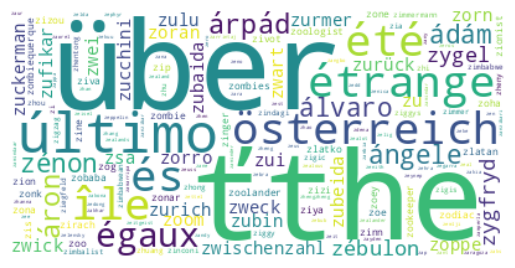

In [60]:
# Word cloud of the most words present in the corpus
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=200, background_color="white").generate_from_frequencies(tfidf.vocabulary_)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


mnb = MultinomialNB(alpha=0.5)
gnb = GaussianNB()
bnb = BernoulliNB()
lgc = LogisticRegression(solver="sag", C=0.5, max_iter=500,
                         random_state=42, tol=0.1, n_jobs=4)
svc = LinearSVC()
rdmfr = RandomForestClassifier(n_estimators=100, random_state=42)
dcst = DecisionTreeClassifier()

In [62]:
x_train_data_resampled.shape, y_train_data_resampled.shape

((96957, 35000), (96957,))

In [63]:
lgc.fit(x_train_data_resampled, y_train_data)
lgc.score(X_test_data_transformed, y_test_data)

0.5160868067516362

In [64]:
bnb.fit(x_train_data_resampled, y_train_data)
bnb.score(X_test_data_transformed, y_test_data)

0.5036169479848432

In [65]:
mnb.fit(x_train_data_resampled, y_train_data)
mnb.score(X_test_data_transformed, y_test_data)

0.5014123320702721

In [66]:
rdmfr.fit(x_train_data_resampled, y_train_data)
rdmfr.score(X_test_data_transformed, y_test_data)

0.4706166035136066

In [67]:
svc.fit(x_train_data_resampled,y_train_data)
svc.score(X_test_data_transformed,y_test_data)

0.48508439545297966

In [68]:
ypred_test_lgc = lgc.predict(X_test_data_transformed)
ypred_train_lgc = lgc.predict(x_train_data_resampled)

ypred_test_bnb = bnb.predict(X_test_data_transformed)
ypred_train_bnb = bnb.predict(x_train_data_resampled)

ypred_test_mnb = mnb.predict(X_test_data_transformed)
ypred_train_mnb = mnb.predict(x_train_data_resampled)

ypred_test_rdmfr = rdmfr.predict(X_test_data_transformed)
ypred_train_rdmfr = rdmfr.predict(x_train_data_resampled)

ypred_test_svc = svc.predict(X_test_data_transformed)
ypred_train_svc = svc.predict(x_train_data_resampled)

In [69]:
from sklearn.metrics import classification_report, accuracy_score

print("Logistic Regression : ")
print("Train accuracy: ", accuracy_score(y_train_data, ypred_train_lgc))
print("Test accuracy: ", accuracy_score(y_test_data, ypred_test_lgc))

print("\n\nBernoulliNB : ")
print("Train accuracy: ", accuracy_score(y_train_data, ypred_train_bnb))
print("Test accuracy: ", accuracy_score(y_test_data, ypred_test_bnb))

print("\n\nMultinomialNB : ")
print("Train accuracy: ", accuracy_score(y_train_data, ypred_train_mnb))
print("Test accuracy: ", accuracy_score(y_test_data, ypred_test_mnb))

print("\n\nRandom Forest : ")
print("Train accuracy: ", accuracy_score(y_train_data, ypred_train_rdmfr))
print("Test accuracy: ", accuracy_score(y_test_data, ypred_test_rdmfr))

print("\n\nSupport Vector : ")
print("Train accuracy: ", accuracy_score(y_train_data, ypred_train_svc))
print("Test accuracy: ", accuracy_score(y_test_data, ypred_test_svc))


Logistic Regression : 
Train accuracy:  0.96816114359974
Test accuracy:  0.5160868067516362


BernoulliNB : 
Train accuracy:  0.9711005909836319
Test accuracy:  0.5036169479848432


MultinomialNB : 
Train accuracy:  0.976556617882154
Test accuracy:  0.5014123320702721


Random Forest : 
Train accuracy:  1.0
Test accuracy:  0.4706166035136066


Support Vector : 
Train accuracy:  0.9993708551213425
Test accuracy:  0.48508439545297966


<Axes: title={'center': 'Logistic Regression Test: '}>

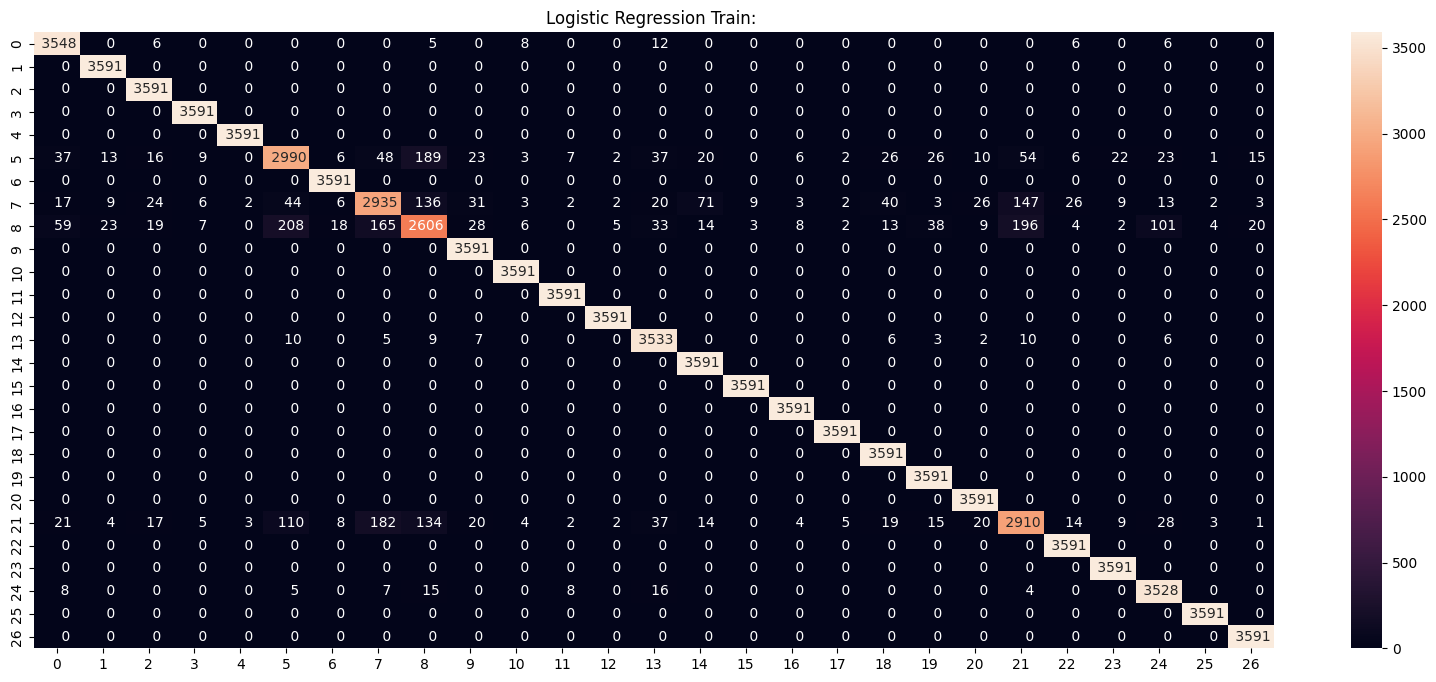

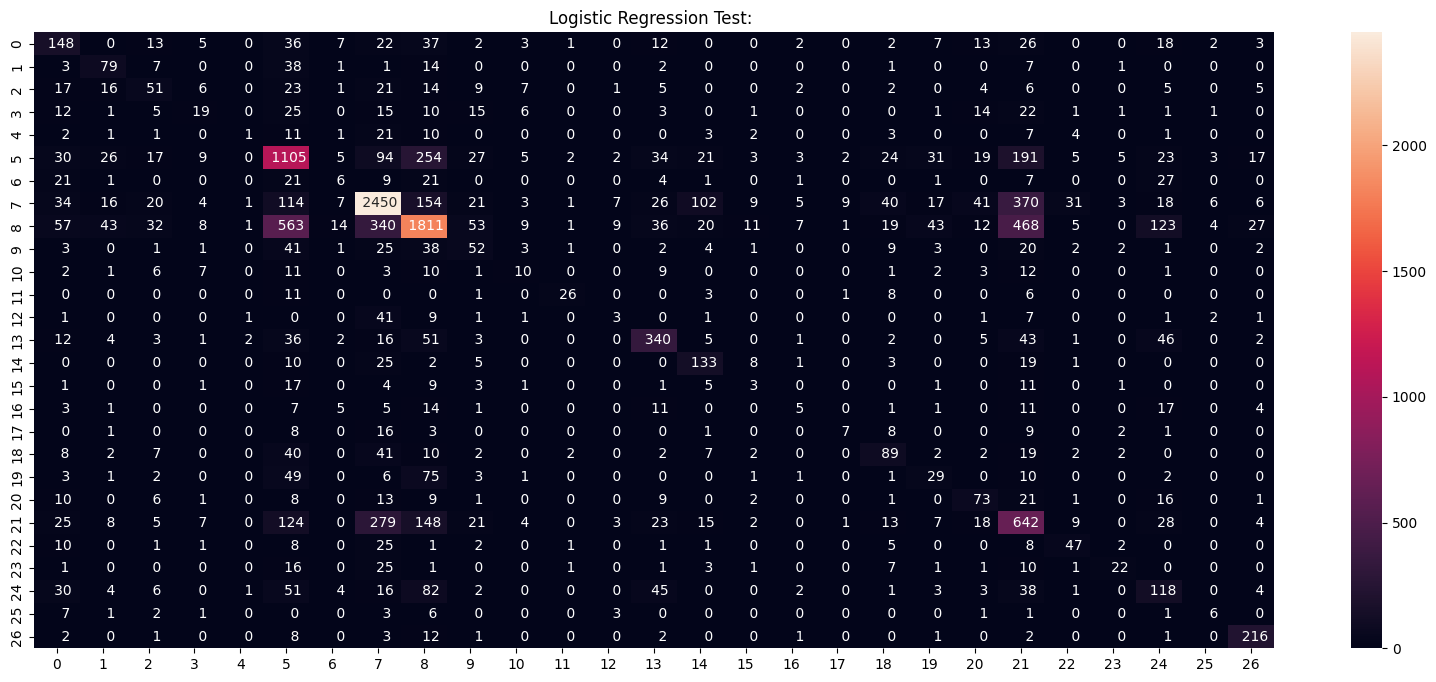

In [70]:
from sklearn.metrics import confusion_matrix,precision_score


cm1 = confusion_matrix(y_train_data,ypred_train_lgc)
plt.figure(figsize=(20,8))
plt.title("Logistic Regression Train: ")
sns.heatmap(cm1,annot=True,fmt="5g")

cm2 = confusion_matrix(y_test_data,ypred_test_lgc)
plt.figure(figsize=(20,8))
plt.title("Logistic Regression Test: ")
sns.heatmap(cm2,annot=True,fmt="5g")

In [71]:
scores = [{"Model":"Logistic Regression","Train Accuracy":0.9469570209304287,"Test Accuracy":0.5159225092250922},
         {"Model":"BernoulliNB","Train Accuracy":0.9135466914795498,"Test Accuracy":0.5279520295202952},
         {"Model":"MultinomialNB","Train Accuracy":0.9321264259925833,"Test Accuracy":0.5173247232472324},
         {"Model":"Random Forest","Train Accuracy":1.0,"Test Accuracy":0.49025830258302583},
         {"Model":"Support Vector","Train Accuracy":0.9908475286422836,"Test Accuracy":0.4839852398523985}]

scoresdf = pd.DataFrame(scores)

In [72]:
# Testing the performance of XGboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train_data_resampled, y_train_data)
xgb.score(X_test_data_transformed, y_test_data)

0.45366861867034103

In [73]:
import pickle as pkl

In [74]:
# Exporting Models, Vectorizer, Encoder uisng Pickle
pkl.dump(scoresdf, open("scores.pkl", "wb"))
pkl.dump(encoder, open("encoder.pkl", "wb"))
pkl.dump(tfidf, open("vectorizer.pkl", "wb"))
pkl.dump(lgc, open("logistic.pkl", "wb"))
pkl.dump(mnb, open("mnb.pkl", "wb"))
pkl.dump(bnb, open("bnb.pkl", "wb"))
pkl.dump(rdmfr, open("rdmfr.pkl", "wb"))
pkl.dump(svc, open("svc.pkl", "wb"))
